In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,r2_score

In [ ]:
car_info = pd.read_csv('/content/Dataset.csv')
print(car_info)

         model  year  price transmission  mileage fuelType  tax   mpg  \
0       Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7   
1        Focus  2018  14000       Manual     9083   Petrol  150  57.7   
2        Focus  2017  13000       Manual    12456   Petrol  150  57.7   
3       Fiesta  2019  17500       Manual    10460   Petrol  145  40.3   
4       Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7   
...        ...   ...    ...          ...      ...      ...  ...   ...   
74995      BMW  2016  12998       Manual    20565   Diesel    0  74.3   
74996   toyota  2017   6995       Manual    20564   Petrol  150  68.9   
74997     Ford  2018  10990       Manual    20563   Petrol  145  65.7   
74998     Ford  2017   7999       Manual    28907   Petrol  125  54.3   
74999     Ford  2015  13583       Manual    21718   Diesel   20  67.3   

       engineSize  
0             1.0  
1             1.0  
2             1.0  
3             1.5  
4             1.0  
...

In [ ]:
print(car_info.columns)

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')


In [ ]:
selected_columns = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
X = car_info[selected_columns]
y = car_info['price']


In [ ]:
X = pd.get_dummies(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3578156.634679952


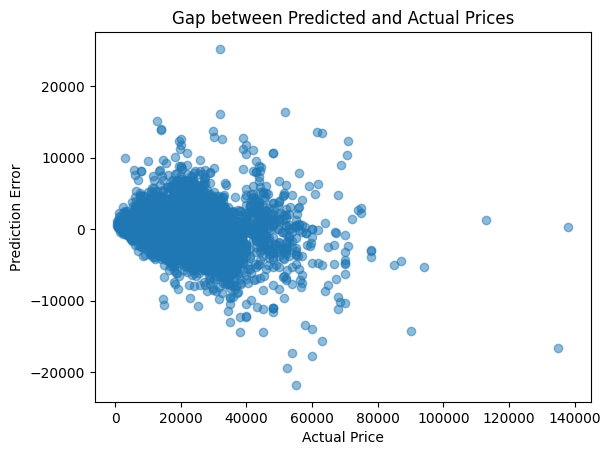

In [ ]:
# Calculate the gap between predicted and actual prices
prediction_error = y_pred - y_test

# Plot the gap using a scatter plot
plt.scatter(y_test, prediction_error, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Prediction Error')
plt.title('Gap between Predicted and Actual Prices')
plt.show()

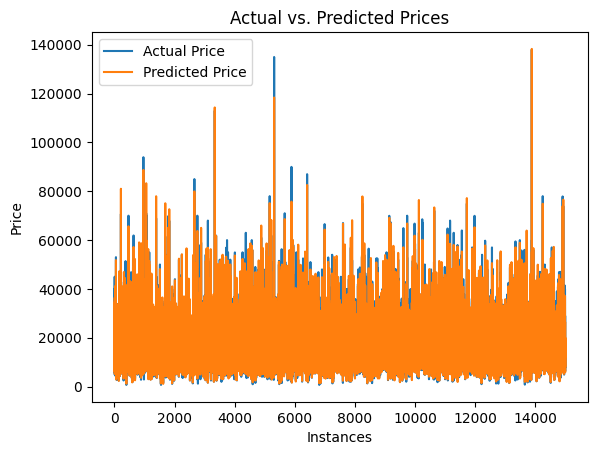

In [ ]:
plt.plot(y_test.values, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.xlabel('Instances')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()

In [ ]:
# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R-squared (coefficient of determination):", r2)

Mean Absolute Error (MAE): 1171.5852096687502
R-squared (coefficient of determination): 0.9571376451943543
